In [56]:
import torch
import torch.nn as nn
from torch.optim import SGD
from numpy import *
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
plt.style.use(['science','notebook','grid'])
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

In [57]:
vals = load(r"C:\Users\Nunocastanheira\Desktop\boooks\research\Gelb!\Code\test\MasterC.npy")

In [58]:
energy = torch.tensor(vals[0,0,:,0],dtype=torch.float)
thickness = torch.tensor(range(1,151),dtype=torch.float)
counts = torch.tensor(vals[0,:,:,1],dtype=torch.float)
train = torch.tensor(vals[0,:,:,1],dtype=torch.float)*10**7
print(shape(energy))
print(shape(train))
print(shape(thickness))
print(energy)
print(train)

torch.Size([2048])
torch.Size([150, 2048])
torch.Size([150])
tensor([ 500.0000,  500.4880,  500.9770,  ..., 1498.5400, 1499.0200,
        1499.5100])
tensor([[2.9532, 2.9536, 2.9540,  ..., 0.0036, 0.0036, 0.0036],
        [2.9545, 2.9549, 2.9553,  ..., 0.0037, 0.0037, 0.0037],
        [2.9357, 2.9361, 2.9365,  ..., 0.0038, 0.0038, 0.0038],
        ...,
        [2.6783, 2.6785, 2.6788,  ..., 0.0050, 0.0049, 0.0049],
        [2.6670, 2.6672, 2.6675,  ..., 0.0050, 0.0049, 0.0049],
        [2.6736, 2.6738, 2.6741,  ..., 0.0050, 0.0049, 0.0049]])


In [59]:
def train_model(x,y,f, n_epochs=500):
    opt = SGD(f.parameters(), lr=10**-6.5)
    L = nn.MSELoss()

    # Train model
    losses = []
    for _ in tqdm(range(n_epochs)):
        opt.zero_grad() 
        loss_value = L(f(x), y)
        loss_value.backward() 
        opt.step() 
        losses.append(loss_value.item())
    return f, losses

N = 2**11
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2048,N)
        self.Matrix2 = nn.Linear(N,N)
        self.Matrix3 = nn.Linear(N,N)
        self.Matrix4 = nn.Linear(N,N)
        self.Matrix5 = nn.Linear(N,1)
        self.R = nn.ReLU()
        self.E = nn.Tanh()
        self.P = nn.Mish()
        self.T = nn.GELU()
    def forward(self,x):
        x = self.R(self.Matrix1(x))
        x = self.P(self.Matrix2(x))
        x = self.E(self.Matrix3(x))
        x = self.T(self.Matrix4(x))
        x = self.Matrix5(x)
        return x.squeeze()

x = train
y = thickness
f = MyNeuralNet()

# Train model
f, losses = train_model(x,y,f, n_epochs=100000)

  0%|          | 79/100000 [00:10<3:40:59,  7.54it/s]


KeyboardInterrupt: 

In [ ]:
min(losses)

In [ ]:
shape(f(x))

In [ ]:
f(x)

In [ ]:
thickness

In [ ]:
plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
torch.save(f, 'Al thickness attempt newest.pt')

In [ ]:
plt.plot(thickness.detach().numpy(), abs(thickness-f(x)).detach().numpy())

In [ ]:
vals2 = load(r"C:\Users\Nunocastanheira\Desktop\boooks\research\Gelb!\Code\test\master 05.npy")

In [ ]:
test = torch.tensor(vals2[0,:,:,1],dtype=torch.float)*10**7


In [ ]:
shape(test)

In [51]:
ar = ones((129, 2048))
ar = append(ar, test, axis = 0)
print(shape(ar))

test2 = torch.tensor(ar,dtype=torch.float)

(150, 2048)


In [52]:
f(test2)

tensor([-5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714,
        -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714,
        -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714,
        -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714,
        -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714,
        -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714,
        -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714,
        -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714,
        -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714,
        -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714,
        -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714,
        -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714, -5.6714,
        -5.6714, -5.6714, -5.6714, -5.67

In [53]:
comp = array(range(11,32))+0.5

In [54]:
f(test2)[-21:]

tensor([11.7447, 12.7505, 13.6692, 14.6769, 15.5382, 16.6983, 17.3386, 18.3633,
        19.4310, 20.3371, 21.1952, 22.1199, 23.7408, 24.0062, 25.1882, 26.8594,
        27.6307, 28.4998, 29.6585, 29.9768, 32.1426], grad_fn=<SliceBackward0>)

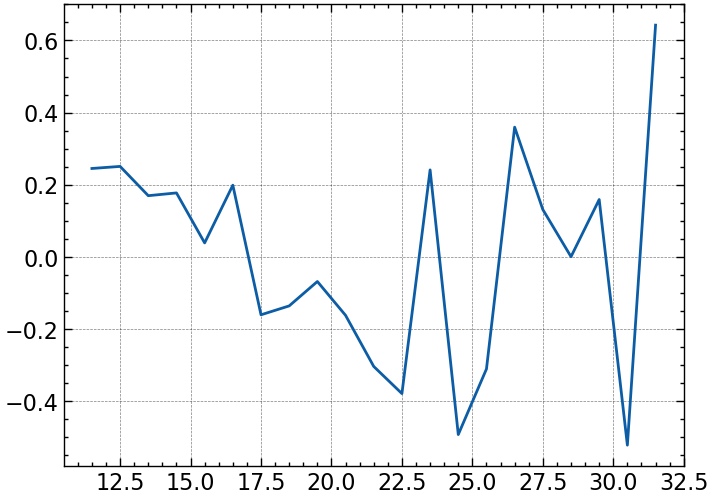

In [55]:
plt.plot(comp, (f(test2).detach().numpy())[-21:]-comp)